<a href="https://colab.research.google.com/github/prieto06co/DataScienceI_84650-Entrega-N1-EdgarArmandoPrietoVargas/blob/main/ProyectoDSParteI%2BEdgarPrietoV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Importación de Librerias

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler

Configuración Global Visual de graficos

In [11]:
sns.set_style("whitegrid")
plt.rcParams['figure.dpi'] = 100
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = ['DejaVu Sans']

Carga Dataset

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/prieto06co/DataScienceI_84650-Entrega-N1-EdgarArmandoPrietoVargas/refs/heads/main/WA_Fn-UseC_-Telco-Customer-Churn.csv')

#Traducción de columnas
column_translation = {
    'customerID': 'ID_Cliente',
    'gender': 'Genero',
    'SeniorCitizen': 'Ciudadano_Mayor',
    'Partner': 'Pareja',
    'Dependents': 'Dependientes',
    'tenure': 'Antiguedad',
    'PhoneService': 'Servicio_Telefono',
    'MultipleLines': 'Multiples_Lineas',
    'InternetService': 'Servicio_Internet',
    'OnlineSecurity': 'Seguridad_Online',
    'OnlineBackup': 'Copia_Seguridad_Online',
    'DeviceProtection': 'Proteccion_Dispositivo',
    'TechSupport': 'Soporte_Tecnico',
    'StreamingTV': 'Streaming_TV',
    'StreamingMovies': 'Streaming_Peliculas',
    'Contract': 'Contrato',
    'PaperlessBilling': 'Facturacion_Electronica',
    'PaymentMethod': 'Metodo_Pago',
    'MonthlyCharges': 'Cargos_Mensuales',
    'TotalCharges': 'Cargos_Totales',
    'Churn': 'Abandono'
}
df = df.rename(columns=column_translation)
print("Nombres de columnas traducidos exitosamente.\n")

Nombres de columnas traducidos exitosamente.



Conversión de Datos

In [13]:
df['Cargos_Totales'] = pd.to_numeric(df['Cargos_Totales'], errors='coerce')
df['Cargos_Totales'] = df['Cargos_Totales'].fillna(0)
print("Limpieza de 'Cargos_Totales' completada.\n")

Limpieza de 'Cargos_Totales' completada.



Análisis Exploratorio de Datos (EDA)

In [14]:
print("Información general del dataset:")
df.info()
print("\n")

print("Primeras 5 filas del dataset:")
print(df.head())
print("\n")

print("Estadísticas descriptivas de las variables numéricas:")
print(df.describe())
print("\n")

Información general del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID_Cliente               7043 non-null   object 
 1   Genero                   7043 non-null   object 
 2   Ciudadano_Mayor          7043 non-null   int64  
 3   Pareja                   7043 non-null   object 
 4   Dependientes             7043 non-null   object 
 5   Antiguedad               7043 non-null   int64  
 6   Servicio_Telefono        7043 non-null   object 
 7   Multiples_Lineas         7043 non-null   object 
 8   Servicio_Internet        7043 non-null   object 
 9   Seguridad_Online         7043 non-null   object 
 10  Copia_Seguridad_Online   7043 non-null   object 
 11  Proteccion_Dispositivo   7043 non-null   object 
 12  Soporte_Tecnico          7043 non-null   object 
 13  Streaming_TV             7043 non-null   obje

Generación de graficos para analisis

Generando Boxplots para 'Antiguedad', 'Cargos_Mensuales' y 'Cargos_Totales'...


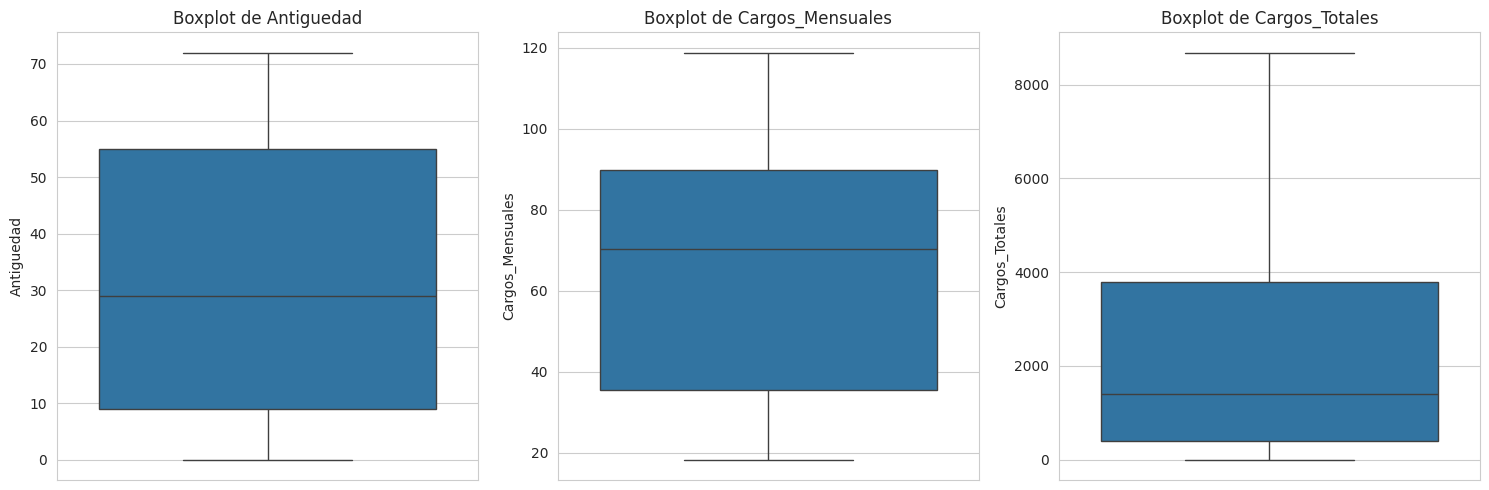

Boxplots generados.



In [15]:
print("Generando Boxplots para 'Antiguedad', 'Cargos_Mensuales' y 'Cargos_Totales'...")
plt.figure(figsize=(15, 5))
numerical_cols_eda = ['Antiguedad', 'Cargos_Mensuales', 'Cargos_Totales']
for i, col in enumerate(numerical_cols_eda):
    plt.subplot(1, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Boxplot de {col}')
plt.tight_layout()
plt.show()

Generando Mapa de calor de correlación


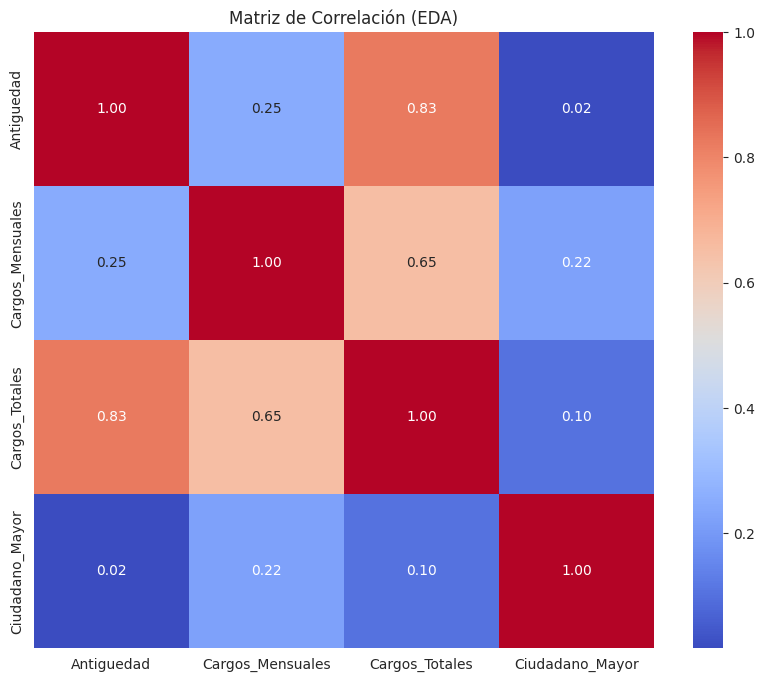

In [16]:
print("Generando Mapa de calor de correlación")
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols_eda + ['Ciudadano_Mayor']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Matriz de Correlación (EDA)')
plt.show()

Generando gráfico de balance de 'Abandono'...


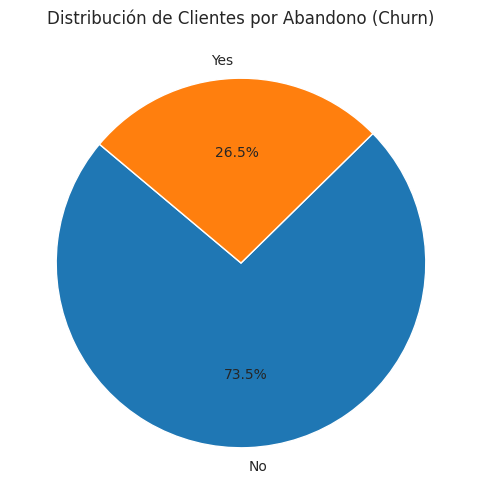

In [17]:
print("Generando gráfico de balance de 'Abandono'...")
plt.figure(figsize=(6, 6))
churn_counts = df['Abandono'].value_counts()
plt.pie(churn_counts, labels=churn_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('Distribución de Clientes por Abandono (Churn)')
plt.show()

Generando gráficos de barras para 'Contrato' y 'Metodo_Pago'...


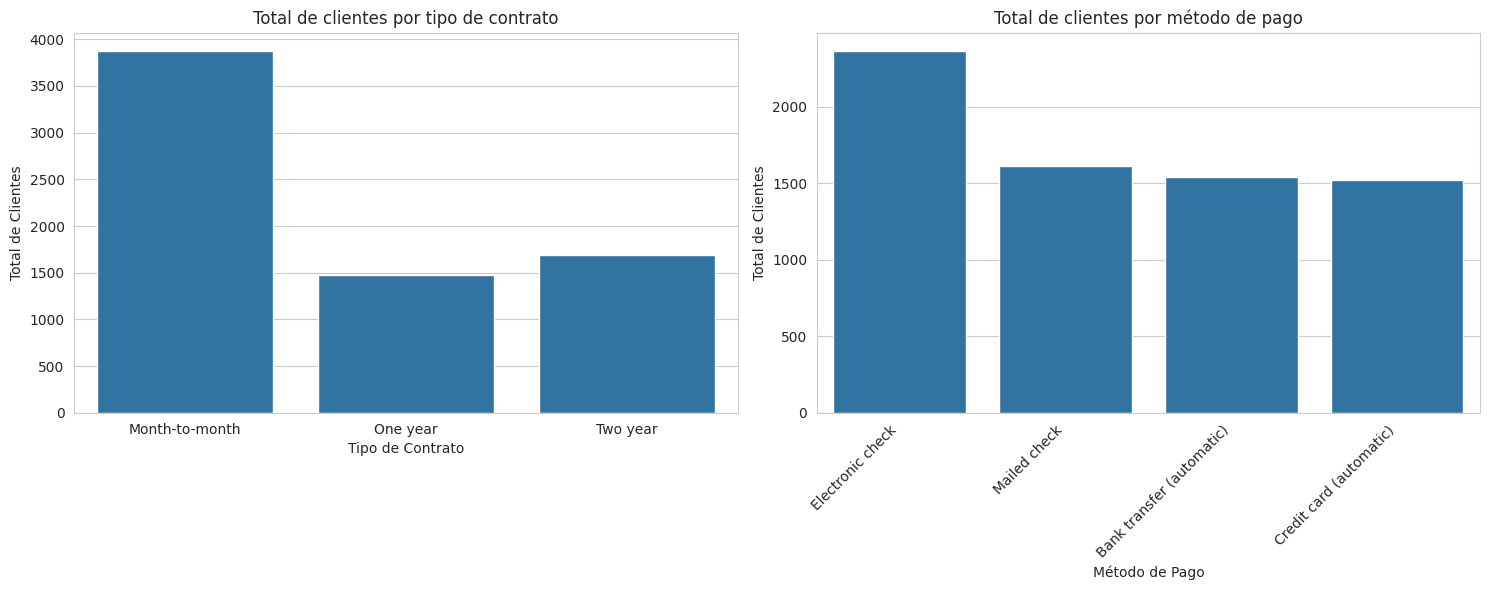

Gráficos de barras generados.



In [18]:
# Gráfico de barras para 'Contrato' y 'Metodo_Pago'
print("Generando gráficos de barras para 'Contrato' y 'Metodo_Pago'...")
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Contrato', data=df)
plt.title('Total de clientes por tipo de contrato')
plt.xlabel('Tipo de Contrato')
plt.ylabel('Total de Clientes')

plt.subplot(1, 2, 2)
sns.countplot(x='Metodo_Pago', data=df)
plt.title('Total de clientes por método de pago')
plt.xlabel('Método de Pago')
plt.ylabel('Total de Clientes')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
print("Gráficos de barras generados.\n")

Generando gráficos apilados para Abandono vs. Genero, Ciudadano_Mayor y Pareja...


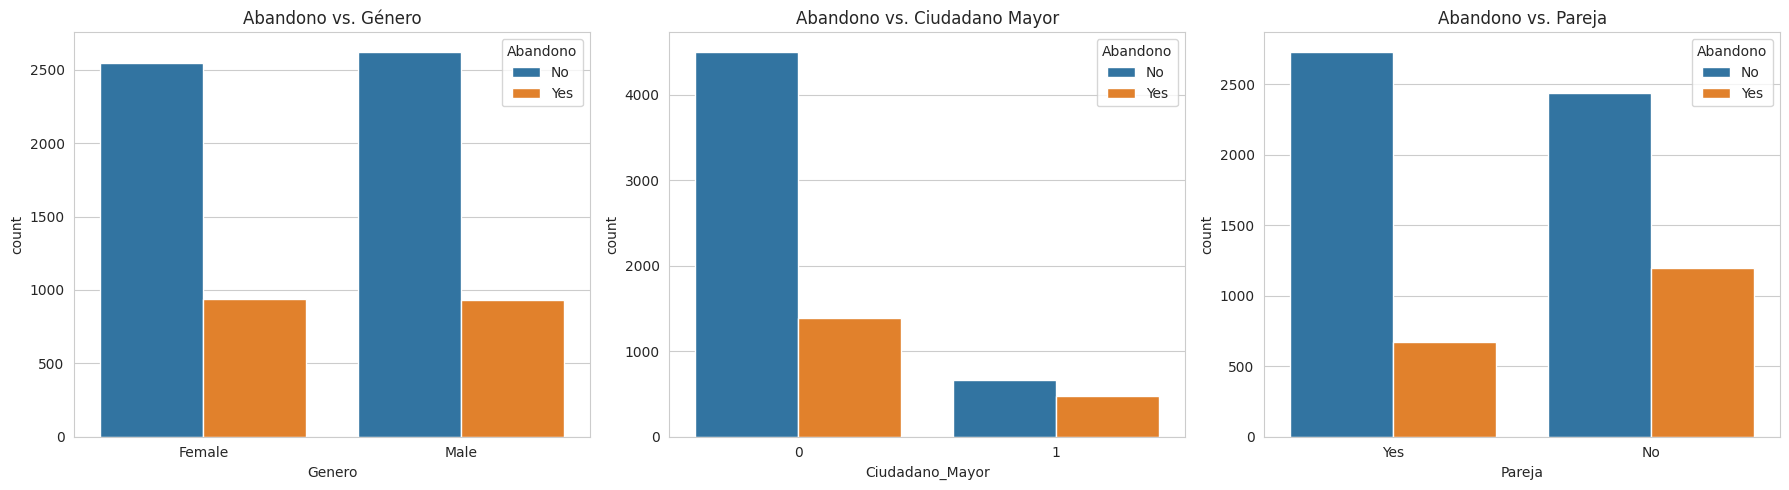

Gráficos apilados generados.



In [19]:
# Gráficos de barras apilados para 'Abandono' vs. otras variables
print("Generando gráficos apilados para Abandono vs. Genero, Ciudadano_Mayor y Pareja...")
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='Genero', hue='Abandono', data=df, ax=axes[0])
axes[0].set_title('Abandono vs. Género')
sns.countplot(x='Ciudadano_Mayor', hue='Abandono', data=df, ax=axes[1])
axes[1].set_title('Abandono vs. Ciudadano Mayor')
sns.countplot(x='Pareja', hue='Abandono', data=df, ax=axes[2])
axes[2].set_title('Abandono vs. Pareja')
plt.tight_layout()
plt.show()
print("Gráficos apilados generados.\n")